In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

sex -> patient's gender (1: male; 0: female)

HighCol -> 0 = no high cholesterol 1 = high cholesterol

CholCheck -> 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

HeartDiseaseorAttack -> coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity -> physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits -> Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies -> Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump -> (adult men >=14 drinks per week and adult women >=7 drinks per week) 0 = no 1 = yes

GenHlth -> Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 
5 = poor

MentHlth -> days of poor mental health scale 1-30 days

PhysHlth -> physical illness or injury days in past 30 days scale 1-30

DiffWalk -> Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Stroke -> you ever had a stroke. 0 = no, 1 = yes

HighBP -> 0 = no high, BP 1 = high BP

Diabetes -> 0 = no diabetes, 1 = diabetes

In [165]:
df = pd.read_csv('./diabetes_data.csv')
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


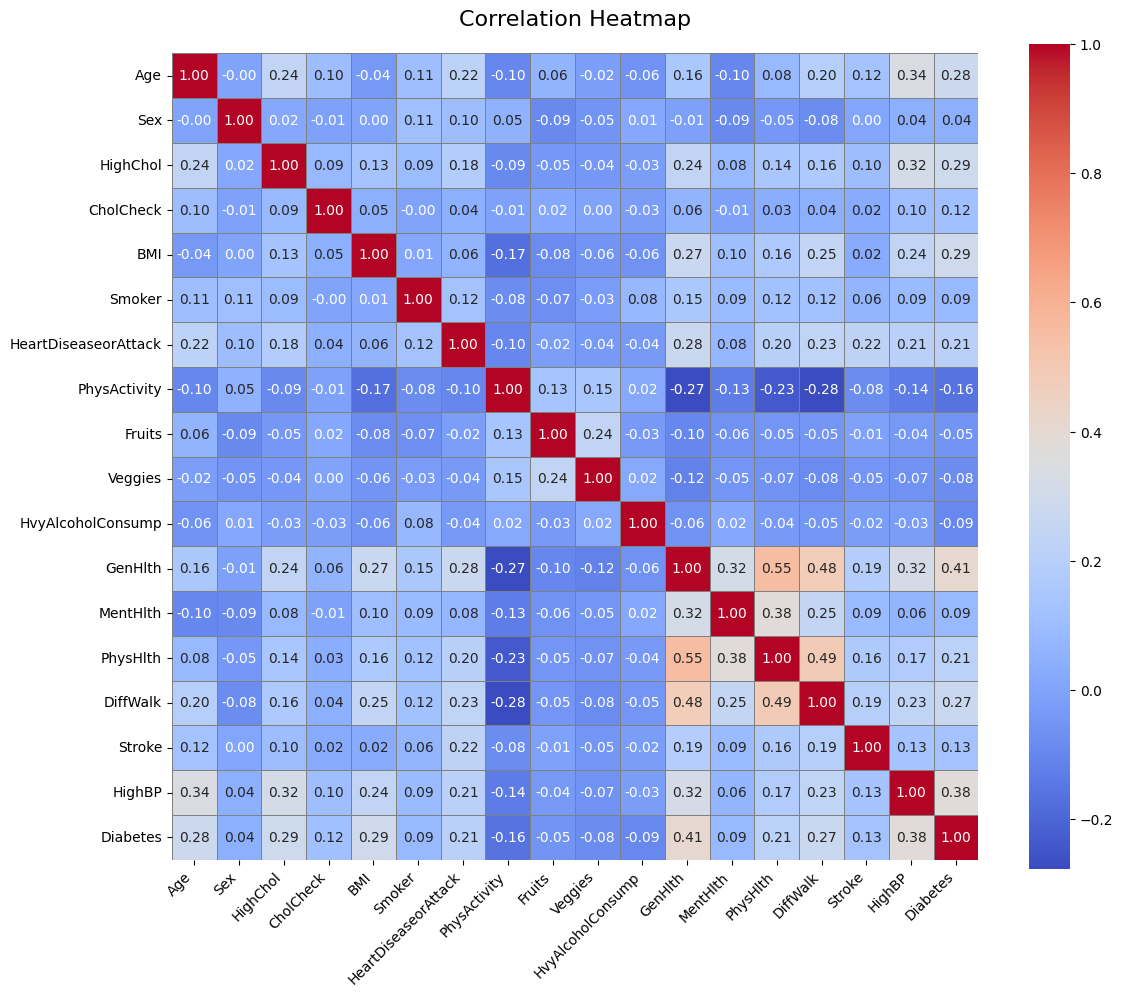

In [166]:
corr = df.corr() 

# Set the figure size and font
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5,       # Adds gridlines
            linecolor='gray',     # Color of the gridlines
            square=True,          # Makes each cell square-shaped
            annot_kws={"size": 10})  # Font size of annotations

# Improve tick label orientation and readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Title formatting
plt.title("Correlation Heatmap", fontsize=16, pad=20)

# Tight layout for spacing
plt.tight_layout()

# Show plot
plt.show()


In [167]:
# 3. Select Features (keeping important ones based on correlation)
selected_features = [
    'HighBP', 'HeartDiseaseorAttack', 'GenHlth', 'DiffWalk', 'Age',
    'BMI', 'PhysActivity', 'HighChol', 'Sex', 'Smoker', 'Fruits', 'Veggies',
    'CholCheck', 'MentHlth', 'PhysHlth', 'Stroke', 'HvyAlcoholConsump'
]
X = df[selected_features].to_numpy()
y = df['Diabetes'].to_numpy()

In [168]:
X_train, X_, y_train, y_ = train_test_split(X,y, test_size=0.40, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_, test_size=0.50, random_state=42)

In [169]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [170]:
# 7. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.8],
    'solver': ['saga'],
    'max_iter': [10000],
    'class_weight': ['balanced']
}

In [171]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

c:\Users\mehim\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1213: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': ['balanced'], 'l1_ratio': [0.2, 0.5, ...], 'max_iter': [10000], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [172]:
print("Best Params:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

Best Params: {'C': 0.01, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best CV ROC-AUC: 0.8240308054226446


In [173]:
model = grid.best_estimator_

In [174]:
print("\n--- Cross Validation ---")
y_pred_cv = model.predict(X_cv)
print("Accuracy:", accuracy_score(y_cv, y_pred_cv))
print("ROC-AUC:", roc_auc_score(y_cv, model.predict_proba(X_cv)[:, 1]))
print(classification_report(y_cv, y_pred_cv))


--- Cross Validation ---
Accuracy: 0.7466402602914132
ROC-AUC: 0.8252382720249771
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7138
         1.0       0.73      0.77      0.75      7000

    accuracy                           0.75     14138
   macro avg       0.75      0.75      0.75     14138
weighted avg       0.75      0.75      0.75     14138



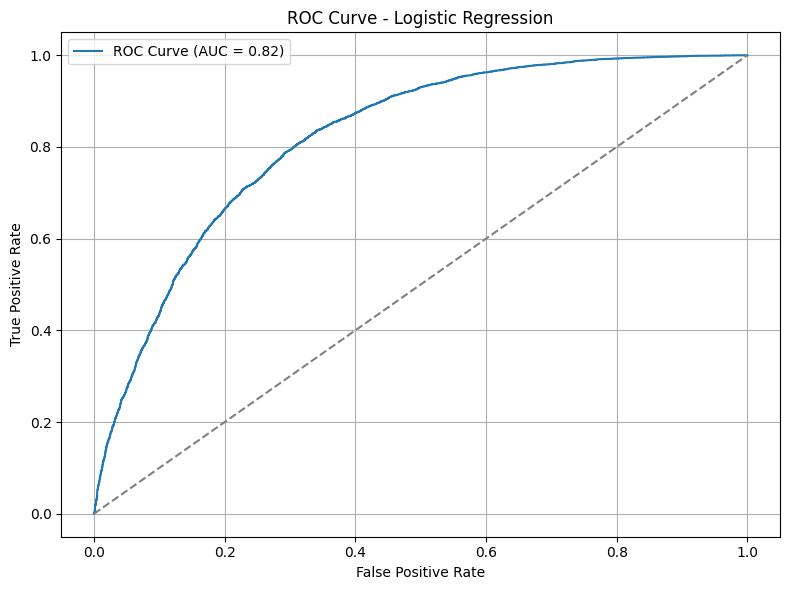

In [175]:
# 🔹 ROC Curve for Test Set
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [176]:
print("\n--- Test Data ---")
y_pred_test = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


--- Test Data ---
Accuracy: 0.7448900205106443
ROC-AUC: 0.8200793793739707
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      6975
         1.0       0.74      0.77      0.75      7164

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139

Confusion Matrix:
 [[5023 1952]
 [1655 5509]]


In [178]:
# 9. Save Model and Scaler
joblib.dump({
    "model": model,
    "scaler": scaler,
}, "Diabetes.pkl")

['Diabetes.pkl']